# Prueba Intertrimestral

Nombre y Apellidos: Sergio Cuenca Núñez

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [1]:
def logistic_map(r, x_n):
    x_n1 = r * x_n * (1 - x_n)
    return x_n1

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [2]:
def logistic_map_iterations(r, x_0, n):
    iterations = [x_0]
    for i in range(1, n):
        x_n = logistic_map(r, iterations[-1])
        iterations.append(x_n)
    return iterations

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [3]:
import pandas as pd

# Parameters
r_values = [i * 0.25 for i in range(1, 17)]
x_0 = 0.2
n_iterations = 10

# Create a list to store the results
data = []

# Generate the iterations for each r
for r in r_values:
    iterations = logistic_map_iterations(r, x_0, n_iterations)
    for n, x_n1 in enumerate(iterations):
        data.append({'r': r, 'n': n, 'x_{n+1}': x_n1})

# Create the dataframe
df_iterations = pd.DataFrame(data)

print(df_iterations.head(10))

      r  n       x_{n+1}
0  0.25  0  2.000000e-01
1  0.25  1  4.000000e-02
2  0.25  2  9.600000e-03
3  0.25  3  2.376960e-03
4  0.25  4  5.928275e-04
5  0.25  5  1.481190e-04
6  0.25  6  3.702427e-05
7  0.25  7  9.255725e-06
8  0.25  8  2.313910e-06
9  0.25  9  5.784761e-07


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [4]:
import matplotlib.pyplot as plt

class LogisticMap:
    def __init__(self, r, x_0):
        self.r = r
        self.x_0 = x_0
        self.iterations = [x_0]

    # Logistic map function
    def logistic_map(self, x_n):
        return self.r * x_n * (1 - x_n)

    # Generate n iterations
    def generate_iterations(self, n):
        self.iterations = [self.x_0]
        for i in range(1, n):
            x_n = self.logistic_map(self.iterations[-1])
            self.iterations.append(x_n)
        return self.iterations

    # Get the n-th iteration
    def get_iteration(self, n):
        if n < len(self.iterations):
            return self.iterations[n]
        else:
            return None

    # Plot the iterations
    def plot_iterations(self):
        plt.plot(range(len(self.iterations)), self.iterations, marker='o')
        plt.title(f'Logistic Map Iterations (r={self.r}, x_0={self.x_0})')
        plt.xlabel('Iteration (n)')
        plt.ylabel('$x_{n+1}$')
        plt.grid(True)
        plt.show()

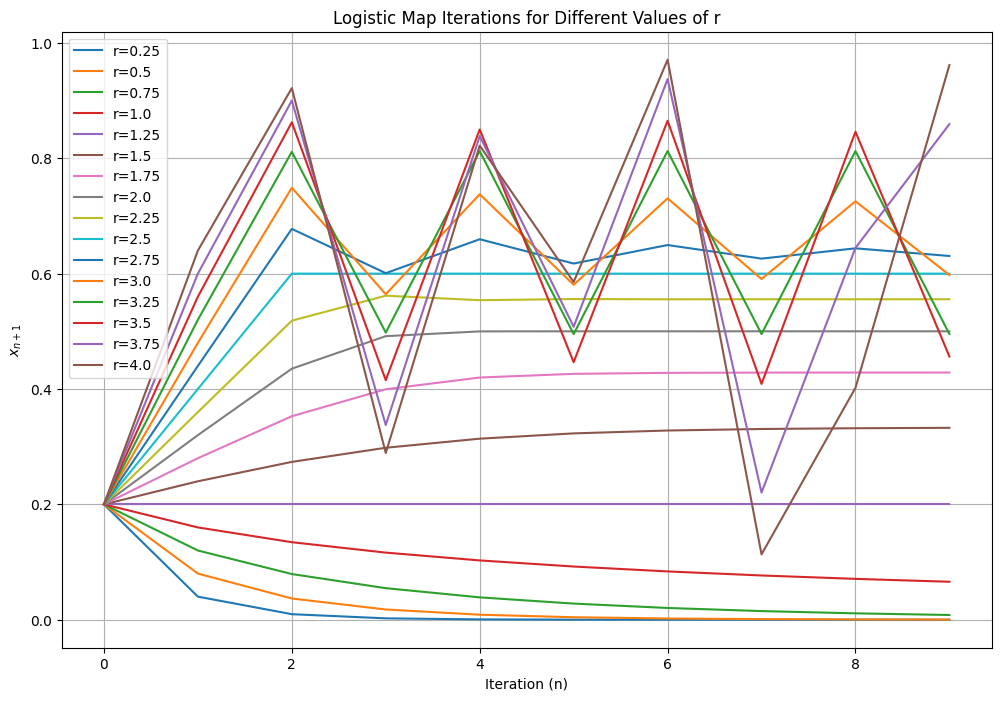

In [5]:
plt.figure(figsize=(12, 8))

# For each r value, plot the iterations
for r in r_values:
    # Use the LogisticMap class
    logistic_map_instance = LogisticMap(r=r, x_0=x_0)
    
    # Get the iterations with the generate iterations function in the LogisticMap class
    logistic_map_instance.generate_iterations(n=n_iterations)
    
    # Visualize them using the plot function in the LogisticMap class
    plt.plot(range(n_iterations), logistic_map_instance.iterations, label=f'r={r}')

# Add title and labels
plt.title('Logistic Map Iterations for Different Values of r')
plt.xlabel('Iteration (n)')
plt.ylabel('$x_{n+1}$')
plt.legend()
plt.grid(True)
plt.show()

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [6]:
import os

path = os.path.abspath("Walmart.csv")
df = pd.read_csv(path)

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6434.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999047
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.876012
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


In [8]:
# As there's only one missing value, we can drop the row
df = df.dropna()

# Check again
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6434.000000,6.434000e+03,6434.000000,6434.000000,6434.000000,6434.000000,6434.000000
mean,22.996581,1.047016e+06,0.069941,60.664434,3.358512,171.575168,7.999047
std,12.986295,5.643956e+05,0.255067,18.446292,0.458992,39.358921,1.876012
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.531677e+05,0.000000,47.445000,2.933000,131.735000,6.891000
50%,23.000000,9.608457e+05,0.000000,62.675000,3.445000,182.616521,7.874000
75%,34.000000,1.420282e+06,0.000000,74.945000,3.735000,212.745096,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



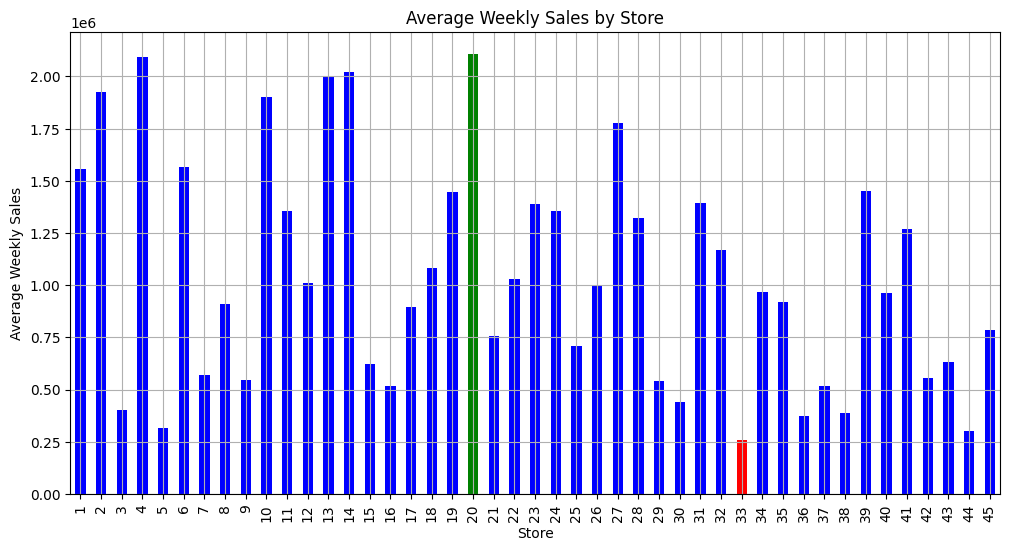

Number of stores: #45
The store with highest average sales is: Store #20
The store with lowest average sales is: Store #33


In [10]:
import matplotlib.pyplot as plt

# Group by 'Store' in order to calculate the average of 'Weekly_Sales' for each one of them
store_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Total number of stores
num_stores = store_sales.count()

# Store with highest and lowest average sales
highest_avg_sales_store = store_sales.idxmax()
lowest_avg_sales_store = store_sales.idxmin()

# Color for stores with highest and lowest average sales
colors = ['green' if store == highest_avg_sales_store else 'red' if store == lowest_avg_sales_store else 'blue' for store in store_sales.index]

# Plot the bar graph
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color=colors)
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

# Results
print(f"Number of stores: #{num_stores}")
print(f"The store with highest average sales is: Store #{highest_avg_sales_store}")
print(f"The store with lowest average sales is: Store #{lowest_avg_sales_store}")

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

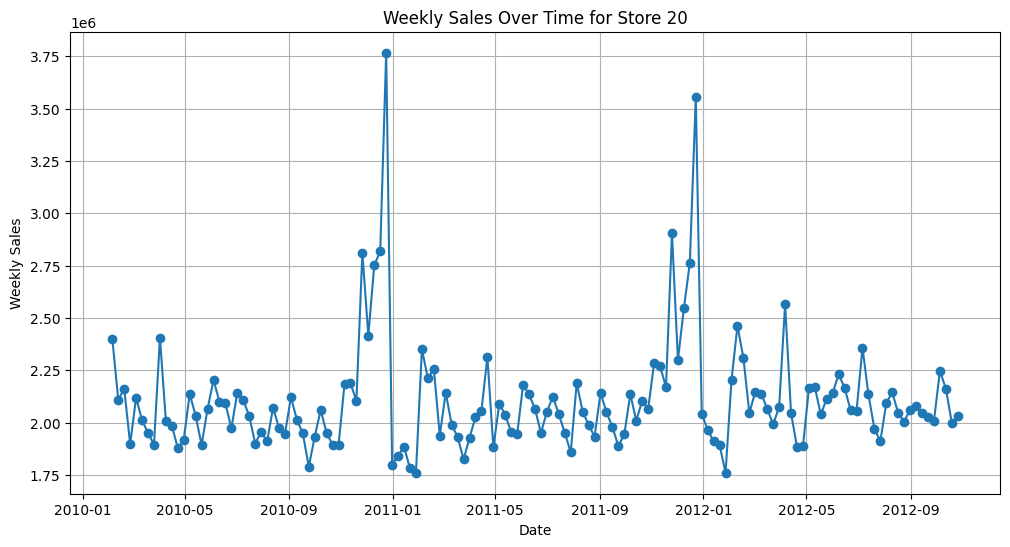

In [11]:
# Filter df for the store with the highest average sales
highest_sales_store_df = df[df['Store'] == highest_avg_sales_store]

# Convert the 'Date' column to datetime format
highest_sales_store_df.loc[:, 'Date'] = pd.to_datetime(highest_sales_store_df['Date'], format='%d-%m-%Y')

# Sort the dataframe by date, so as the evolution can be seen
highest_sales_store_df = highest_sales_store_df.sort_values(by='Date')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(highest_sales_store_df['Date'], highest_sales_store_df['Weekly_Sales'], marker='o')
plt.title('Weekly Sales Over Time for Store {}'.format(highest_avg_sales_store))
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

Se pueden observar los siguientes patrones y tendencias:

1. **Patrones Estacionales**: Se observan picos recurrentes en las ventas que podrían corresponder a temporadas de alta demanda (noviembre/diciembre de 2011 y noviembre/diciembre de 2012), como las vacaciones de Navidad y el Thanksgiving. Estos picos parecen repetirse anualmente, indicando un patrón estacional.

2. **Tendencia General**: A lo largo del tiempo, las ventas muestran una tendencia general al alza, aunque con fluctuaciones significativas. Esto sugiere que, a pesar de las variaciones estacionales, la tienda ha experimentado un crecimiento en las ventas semanales.

3. **Fluctuaciones Semanales**: Además de los picos estacionales, también hay variaciones semanales que podrían estar influenciadas por factores externos como promociones, cambios en el precio del combustible, o condiciones económicas.

Se puede deducir que la tienda con más ventas totales ha experimentado un crecimiento constante en las ventas a lo largo del tiempo, con picos estacionales recurrentes y fluctuaciones semanales.

# Ejercicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

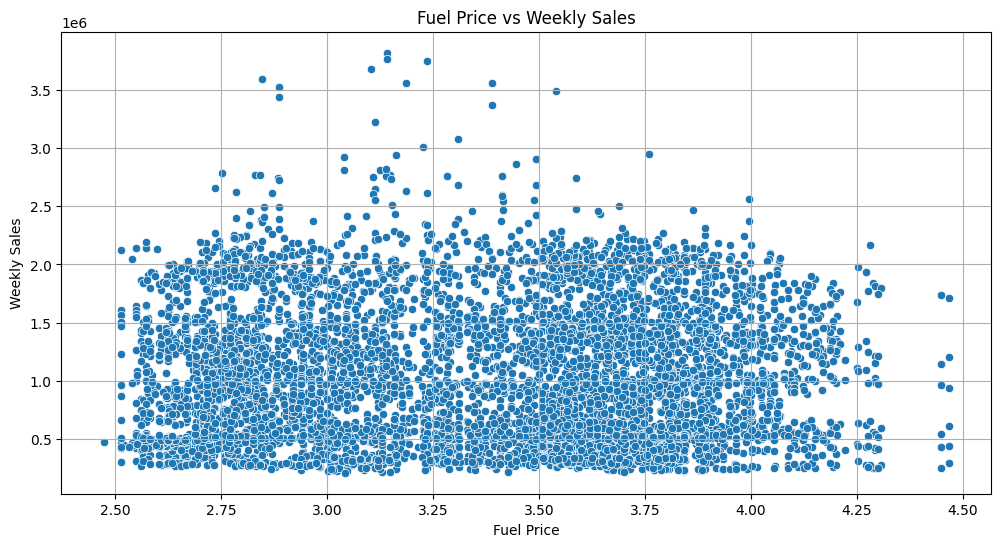

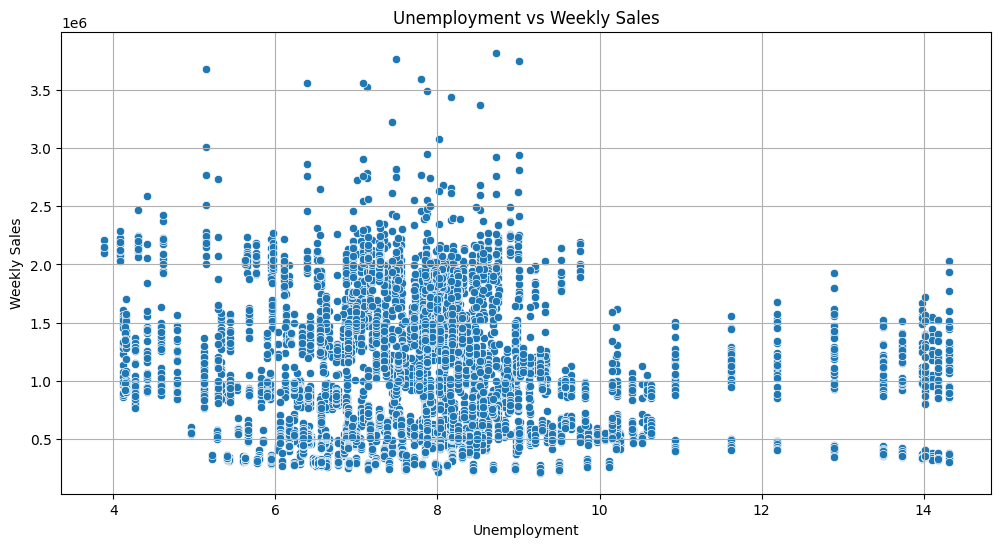

Correlation between Fuel Price and Weekly Sales: 0.009585801362649152
Correlation between Unemployment and Weekly Sales: -0.10614768999329721


In [12]:
import seaborn as sns

# Scatter plot for Fuel Price vs Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Scatter plot for Unemployment vs Weekly Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Calculate correlation coefficients
correlation_fuel_price = df['Fuel_Price'].corr(df['Weekly_Sales'])
correlation_unemployment = df['Unemployment'].corr(df['Weekly_Sales'])

print(f"Correlation between Fuel Price and Weekly Sales: {correlation_fuel_price}")
print(f"Correlation between Unemployment and Weekly Sales: {correlation_unemployment}")

En base a los dos scatterplots y los valores de correlación calculados, se puede decir que:

1. **Fuel Price vs Weekly Sales**:
    - El valor de correlación entre el precio del combustible ($Fuel Price$) y las ventas semanales ($Weekly Sales$) es $0.0096$. 
    - Este valor es prácticamente nulo, lo que indica que no existe una correlación significativa entre el precio del combustible y las ventas semanales.

2. **Unemployment vs Weekly Sales**:
    - El valor de correlación entre la tasa de desempleo ($Unemployment$) y las ventas semanales ($Weekly Sales$) es $-0.1061$.
    - Este valor también es muy cercano a 0, aunque ligeramente negativo, lo que sugiere una débil correlación negativa. Sin embargo, esta correlación tampoco es lo suficientemente fuerte como para considerarse significativa.

c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estadísticamente significativa? (1 puntos)


In [13]:
from scipy.stats import ttest_ind

# Group by 'Holiday_Flag' in order to calculate the average of 'Weekly_Sales'
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Average sales for holiday and normal weekls
avg_sales_holiday = holiday_sales[1]
avg_sales_without_holiday = holiday_sales[0]

# Print the average sales
print(f"Average sales during holiday weeks: {avg_sales_holiday}")
print(f"Average sales during non-holiday weeks: {avg_sales_without_holiday}")

# Do the t-test to check if the difference is statistically significant
holiday_sales_data = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales_data = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

t_stat, p_value = ttest_ind(holiday_sales_data, non_holiday_sales_data)

# Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check the null hypothesis: If the p-value is less than 0.05 to determine statistical significance, reject it
if p_value < 0.05:
    print("The difference in average sales between holiday and non-holiday weeks is statistically significant.")
else:
    print("The difference in average sales between holiday and non-holiday weeks is not statistically significant.")

Average sales during holiday weeks: 1122887.8923555557
Average sales during non-holiday weeks: 1041310.3793482621
T-statistic: 2.958761497898591
P-value: 0.0031000339901994882
The difference in average sales between holiday and non-holiday weeks is statistically significant.


Hay suficiente evidencia para afirmar que las ventas en semanas festivas son significativamente diferentes de las ventas en semanas no festivas, por lo que se puede concluir que si hay una diferencia real entre semanas de vacaciones y semanas normales dado que se rechaza la hipotesis nula $H_0$. Ello indica que es poco probable que la diferencia observada se deba al azar, lo cual es lógico dado que en semanas festivas se espera un aumento en las ventas.

# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [14]:
from sklearn.model_selection import train_test_split

# Divide the dataset between train-test
X = df.copy().drop("Weekly_Sales", axis = 1)
y = df["Weekly_Sales"].copy()

# Convert 'Date' column to datetime format
X['Date'] = pd.to_datetime(X['Date'], format='%d-%m-%Y')

# Extract year, month, and day of week from 'Date'
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['DayOfWeek'] = X['Date'].dt.dayofweek

# Drop the original column
X = X.drop('Date', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selection of characteristics
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, y_train)

# Characteristics and scores
feature_scores = selector.scores_
feature_names = X_train.columns

# Results
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)
print(feature_importance_df)


        Feature       Score
0         Store  569.828912
5  Unemployment   46.505586
7         Month   28.935441
4           CPI   27.072536
2   Temperature   15.600134
1  Holiday_Flag    5.014175
6          Year    2.829051
3    Fuel_Price    0.081895
8     DayOfWeek    0.000000


In [16]:
# Select the most important characteristics in the dataset
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Selected characteristics
selected_features = X_train.columns[selector.get_support()]
selected_features


Index(['Store', 'Temperature', 'CPI', 'Unemployment', 'Month'], dtype='object')

In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Linear Regression
reg = ElasticNet()
reg.fit(X_train_selected, y_train)

# Predictions
predictions_train = reg.predict(X_train_selected)
predictions_test = reg.predict(X_test_selected)

# Results
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print("Linear Regression:")
print(f"R² (train): {r2_train}")
print(f"R² (test): {r2_test}")

Linear Regression:
R² (train): 0.14896290387455424
R² (test): 0.1452723773902176


In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# Train Ridge Regression
ridge = Ridge()
ridge.fit(X_train_selected, y_train)

# Predictions using Ridge Regression
ridge_predictions_train = ridge.predict(X_train_selected)
ridge_predictions_test = ridge.predict(X_test_selected)

# Train Lasso Regression
lasso = Lasso()
lasso.fit(X_train_selected, y_train)

# Predictions using Lasso Regression
lasso_predictions_train = lasso.predict(X_train_selected)
lasso_predictions_test = lasso.predict(X_test_selected)

# Train Random Forest Regression model
rf = RandomForestRegressor()
rf.fit(X_train_selected, y_train)

# Predictions using Random Forest Regression
rf_predictions_train = rf.predict(X_train_selected)
rf_predictions_test = rf.predict(X_test_selected)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Evaluate the models
ridge_r2_train, ridge_mse_train, ridge_rmse_train = evaluate_model(y_train, ridge_predictions_train)
ridge_r2_test, ridge_mse_test, ridge_rmse_test = evaluate_model(y_test, ridge_predictions_test)

lasso_r2_train, lasso_mse_train, lasso_rmse_train = evaluate_model(y_train, lasso_predictions_train)
lasso_r2_test, lasso_mse_test, lasso_rmse_test = evaluate_model(y_test, lasso_predictions_test)

rf_r2_train, rf_mse_train, rf_rmse_train = evaluate_model(y_train, rf_predictions_train)
rf_r2_test,rf_mse_test,rf_rmse_test = evaluate_model(y_test, rf_predictions_test)

# Results
print("\nRidge Regression:")
print(f"R² (train): {ridge_r2_train}")
print(f"R² (test): {ridge_r2_test}")
print(f"MSE (train): {ridge_mse_train}")
print(f"MSE (test): {ridge_mse_test}")
print(f"RMSE (train): {ridge_rmse_train}")
print(f"RMSE (test): {ridge_rmse_test}")

print("\nLasso Regression:")
print(f"R² (train): {lasso_r2_train}")
print(f"R² (test): {lasso_r2_test}")
print(f"MSE (train): {lasso_mse_train}")
print(f"MSE (test): {lasso_mse_test}")
print(f"RMSE (train): {lasso_rmse_train}")
print(f"RMSE (test): {lasso_rmse_test}")

print("\nRandom Forest Regression:")
print(f"R² (train): {rf_r2_train}")
print(f"R² (test): {rf_r2_test}")
print(f"MSE (train): {rf_mse_train}")
print(f"MSE (test): {rf_mse_test}")
print(f"RMSE (train): {rf_rmse_train}")
print(f"RMSE (test): {rf_rmse_test}")


Ridge Regression:
R² (train): 0.14905175075944743
R² (test): 0.14530934164017018
MSE (train): 268620853816.16995
MSE (test): 277819030268.6911
RMSE (train): 518286.4592251759
RMSE (test): 527085.4107909752

Lasso Regression:
R² (train): 0.1490517507806548
R² (test): 0.14530933022603354
MSE (train): 268620853809.47534
MSE (test): 277819033978.8807
RMSE (train): 518286.45921871753
RMSE (test): 527085.4143105088

Random Forest Regression:
R² (train): 0.9911971654074041
R² (test): 0.9337904451194653
MSE (train): 2778811691.987136
MSE (test): 21521557713.911194
RMSE (train): 52714.43532835324
RMSE (test): 146702.27576254975


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

# Informe de Resultados

## 1. Introducción

Se presentan, a continuación, los principales hallazgos del análisis de datos de la cadena de tiendas Walmart y la modelización predictiva de las ventas semanales de combustible. Se han utilizado diversas técnicas para identificar los factores que más influyen en las ventas y proporcionar recomendaciones basadas en los resultados obtenidos.

## 2. Análisis de Datos

### Descripción del Dataset

El dataset tiene información sobre las ventas semanales ($Weekly_Sales$) de combustible, junto con variables como su precio ($Fuel_Price$), la tasa de desempleo ($Unemployment$), la temperatura ($Temperature$), el índice de precios al consumidor ($CPI$), y un indicador de semanas festivas ($HolidayFlag$). Primeramente, se describen las principales variables del dataset y se chequeó la presencia de valores faltantes, encontrando que solo la variable $Unemployment$ tenía un valor faltante, el cual fue eliminado para mantener la integridad del análisis.

### Exploración de Variables

1. **Número de Tiendas y Media de Ventas**:
    - El dataset contiene datos de 45 tiendas.
    - La tienda con la mayor media de ventas semanales es la tienda #20, mientras que la cuenta con menos es la tienda #33.

2. **Patrones Estacionales y Tendencias**:
    - Se observan picos estacionales en las ventas durante las temporadas de alta demanda, como las vacaciones de Navidad y el Thanksgiving.
    - A lo largo del tiempo, las ventas muestran una tendencia general al alza, aunque hay fluctuaciones significativas.

3. **Relación entre Factores Externos y Ventas**:
    - No se encontró una correlación significativa entre el precio del combustible y las ventas semanales.
    - La correlación entre la tasa de desempleo y las ventas semanales es débilmente negativa, pero no significativa.

4. **Impacto de Semanas Festivas en las Ventas**:
    - La media de ventas durante las semanas festivas son significativamente más altas que durante las semanas no festivas, comprobado por el rechazo de la hipótesis nula.

## 3. Modelización Predictiva

### Selección de Características

Para explorar las variables importantes para predecir las ventas semanales, se utilizó una técnica de selección de características. Las cinco características más importantes fueron: $Store$, $Temperature$, $CPI$, $Unemployment$, y $Month$.

### Comparación de Modelos

Dado que el modelo de regresión lineal mostraba resultados pésimos y una precisión muy baja, se probaron otros tres modelos de regresión: Ridge, Lasso y Random Forest. Los dos primeros con el objeto de mejorar el resultado de la regresión lineal ya que son modelos de regresión lineal regularizados que penalizan los coeficientes de las variables menos importantes, y el último para comparar con los otros dos.

Los modelos se evaluaron utilizando el coeficiente de determinación (R²), el error cuadrático medio (MSE) y la raíz del error cuadrático medio (RMSE).

- **Ridge Regression**:
  - R² (train): 0.149
  - R² (test): 0.145
  - MSE (train): 268620853816.17
  - MSE (test): 277819030268.69
  - RMSE (train): 518286.4592251759
  - RMSE (test): 527085.4107909752

- **Lasso Regression**:
  - R² (train): 0.149
  - R² (test): 0.145
  - MSE (train): 268620853809.48
  - MSE (test): 277819033978.88
  - RMSE (train): 518286.45921871753
  - RMSE (test): 527085.4143105088

- **Random Forest Regression**:
  - R² (train): 0.992
  - R² (test): 0.934
  - MSE (train): 2650169912.79
  - MSE (test): 21395046684.20
  - RMSE (train): 51479.80101736022
  - RMSE (test): 146270.4573186422

El modelo regresor de Random Forest es el que mostró mejor desempeño con un R² de 0.934 en el conjunto de prueba, indicando una muy buena capacidad de predicción de ventas semanales.

## 4. Conclusiones y Recomendaciones

1. **Factores que Influyen en las Ventas**:
    - Las variables $Store$, $Temperature$, $CPI$, $Unemployment$, y $Month$ son las más importantes para predecir las ventas semanales.
    - Las semanas festivas tienen un impacto significativo en el aumento de las ventas.

2. **Recomendaciones**:
    - **Optimización de Inventario**: Aumentar el inventario durante las semanas festivas para aprovechar el aumento en las ventas.
    - **Promociones Estacionales**: Implementar promociones específicas durante las temporadas de alta demanda para maximizar las ventas.
    - **Monitoreo de Factores Externos**: Continuar monitoreando factores como la tasa de desempleo y el CPI, ya que pueden influir en las ventas a largo plazo.